In [138]:
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats, integrate

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [139]:
df = pd.read_csv("wine.data")
df.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
              'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [140]:
wine = df
df.columns

Index([u'Class', u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash',
       u'Magnesium', u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')

In [141]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [142]:
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
Alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Alcalinity of ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
Magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
Nonflavanoid phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


In [143]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [144]:
wine['Mag10'] = wine['Magnesium'] // 10

In [145]:
wine.Mag10.value_counts()

8     48
9     45
10    41
11    24
12     9
13     4
7      4
16     1
15     1
Name: Mag10, dtype: int64

(array([  1.,   0.,   0.,   3.,   6.,   1.,   7.,   5.,   7.,  11.,  13.,
          7.,   5.,   8.,   8.,  11.,   8.,   8.,   7.,  11.,   7.,  11.,
         11.,   3.,   6.,   5.,   5.,   0.,   0.,   2.]),
 array([ 11.03      ,  11.15666667,  11.28333333,  11.41      ,
         11.53666667,  11.66333333,  11.79      ,  11.91666667,
         12.04333333,  12.17      ,  12.29666667,  12.42333333,
         12.55      ,  12.67666667,  12.80333333,  12.93      ,
         13.05666667,  13.18333333,  13.31      ,  13.43666667,
         13.56333333,  13.69      ,  13.81666667,  13.94333333,
         14.07      ,  14.19666667,  14.32333333,  14.45      ,
         14.57666667,  14.70333333,  14.83      ]),
 <a list of 30 Patch objects>)

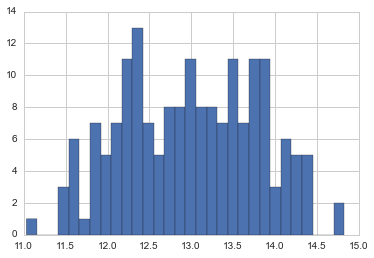

In [146]:
plt.hist(df.Alcohol,bins=30)

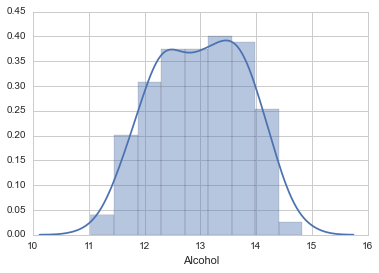

In [147]:
sns.distplot(wine.Alcohol)

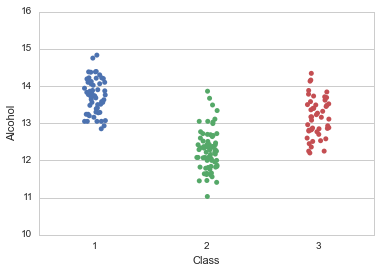

In [148]:
sns.stripplot(x='Class',y='Alcohol',data=wine, jitter= True)

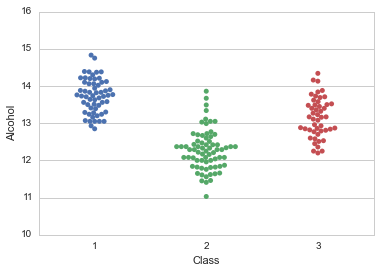

In [149]:
sns.swarmplot(x='Class',y='Alcohol',data=wine)

In [150]:
#plt.figure(figsize=(8,8))

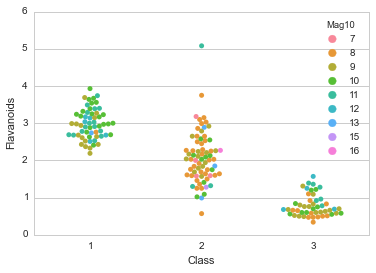

In [151]:
sns.swarmplot(x='Class',y='Flavanoids',hue= 'Mag10', data=wine)

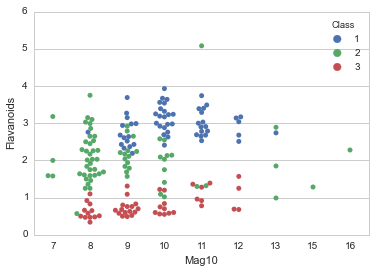

In [152]:
sns.swarmplot(x='Mag10',y='Flavanoids',hue= 'Class', data=wine)

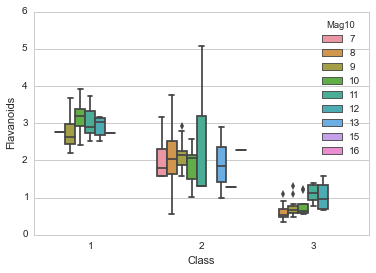

In [153]:
sns.boxplot(x='Class',y='Flavanoids',hue= 'Mag10', data=wine)

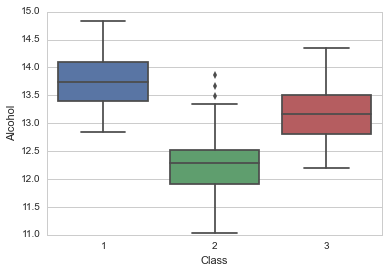

In [154]:
sns.boxplot(x='Class',y='Alcohol', data=wine)

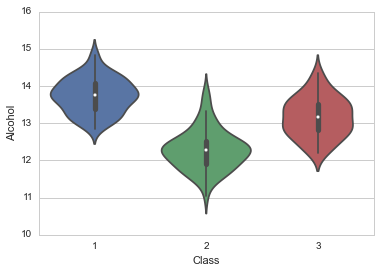

In [155]:
sns.violinplot(x='Class',y='Alcohol', data=wine)

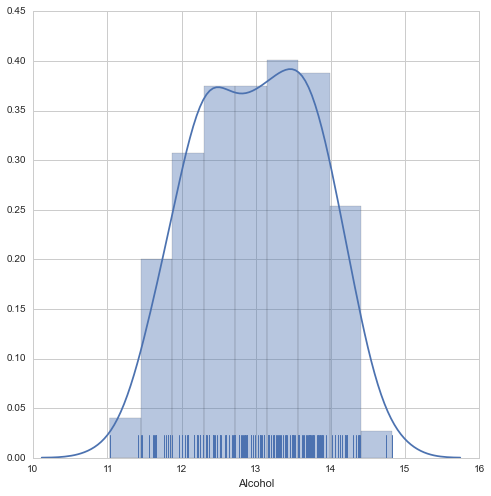

In [156]:
plt.figure(figsize=(8,8))
sns.distplot(df.Alcohol, kde=True, rug=True);

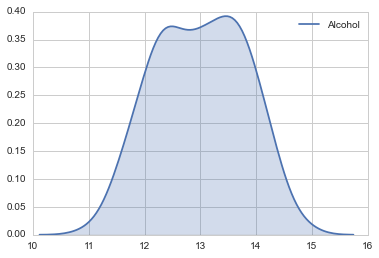

In [157]:
sns.kdeplot(df.Alcohol, shade=True);

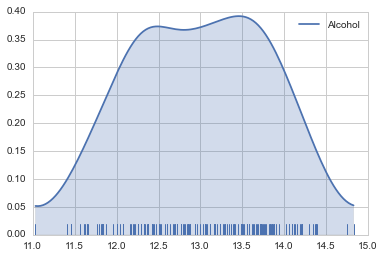

In [158]:
sns.kdeplot(df.Alcohol, shade=True, cut=0)
sns.rugplot(df.Alcohol);

In [159]:
wine.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Mag10
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,10
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,10
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,11
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,11
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,11


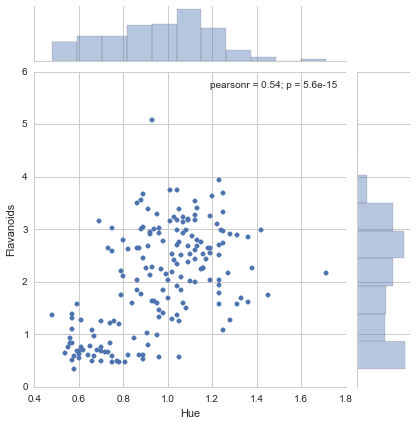

In [160]:
sns.jointplot(x="Hue", y="Flavanoids", data=wine);

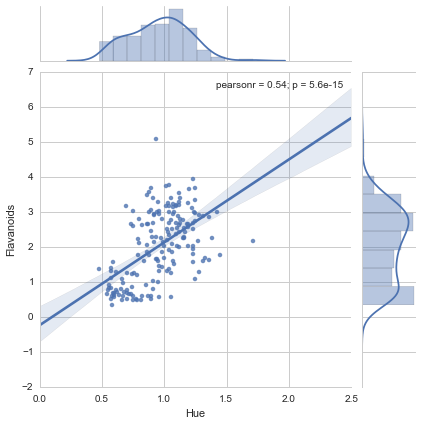

In [161]:
sns.jointplot(x="Hue", y="Flavanoids", data=wine, kind = "reg");

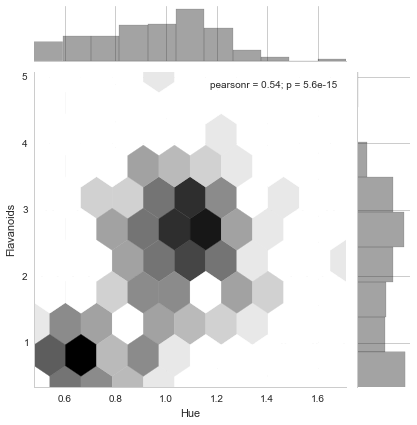

In [162]:
 sns.jointplot(x="Hue", y="Flavanoids", kind="hex", color="k", data=wine);

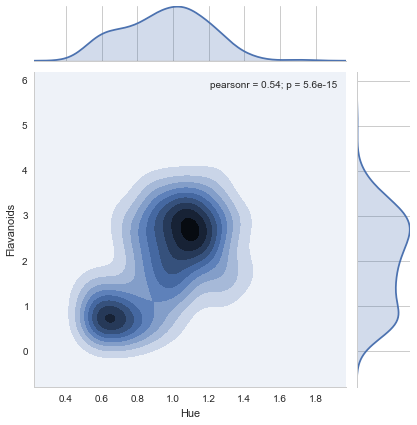

In [163]:
sns.jointplot(x="Hue", y="Flavanoids", data=wine, kind="kde");

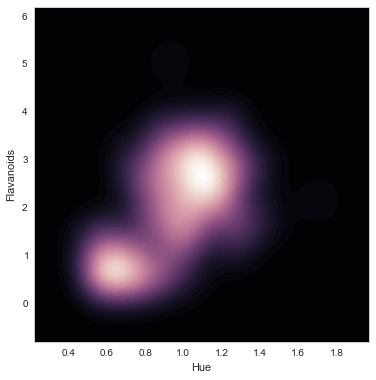

In [164]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(wine.Hue,wine.Flavanoids, cmap=cmap, n_levels=60, shade=True);

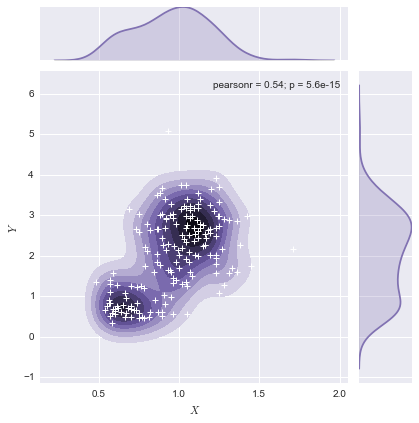

In [165]:
plt.figure(figsize=(10,10))
sns.set(color_codes=True)
g = sns.jointplot(x="Hue", y="Flavanoids", data=wine, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

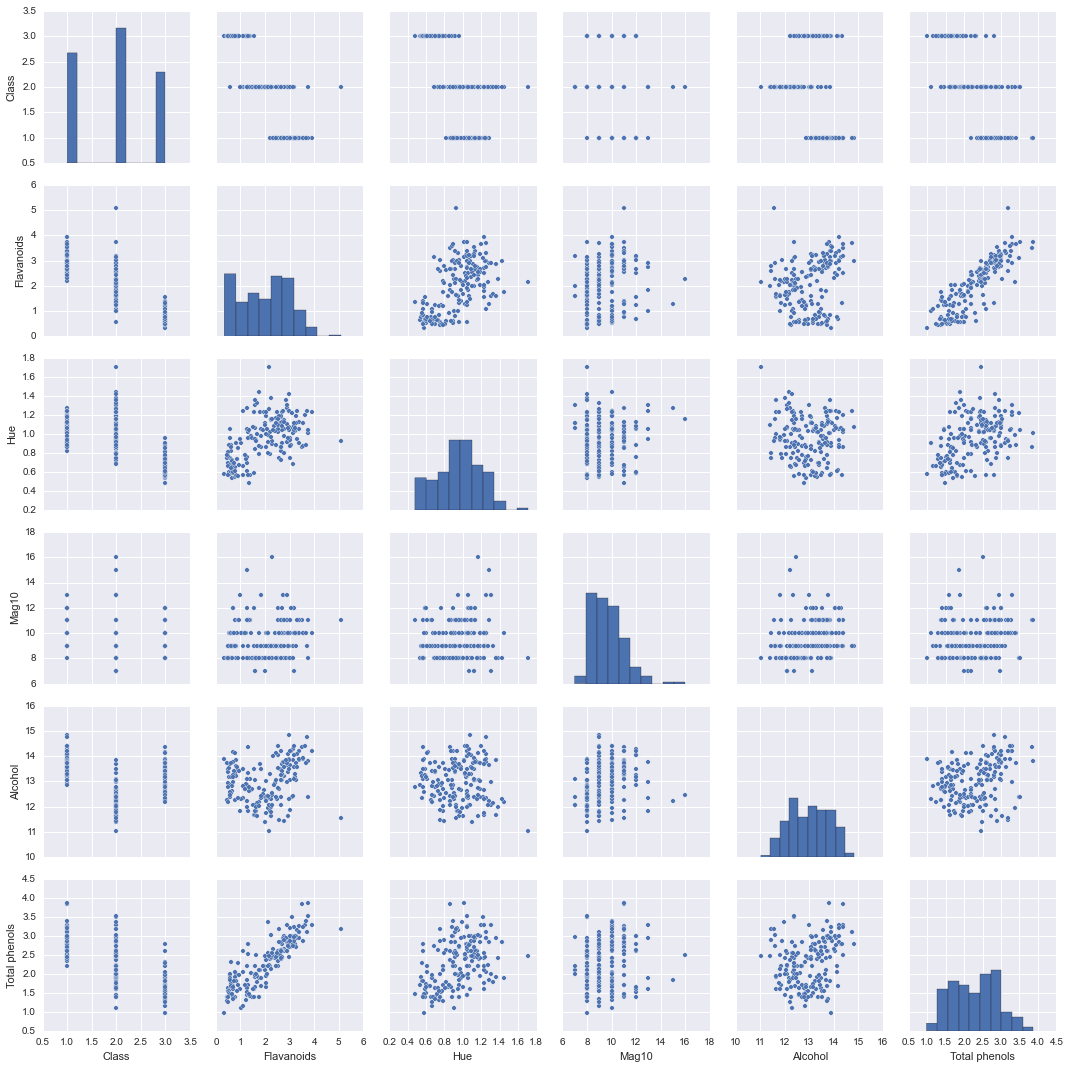

In [166]:
sns.pairplot(wine[['Class','Flavanoids','Hue','Mag10','Alcohol','Total phenols']]);

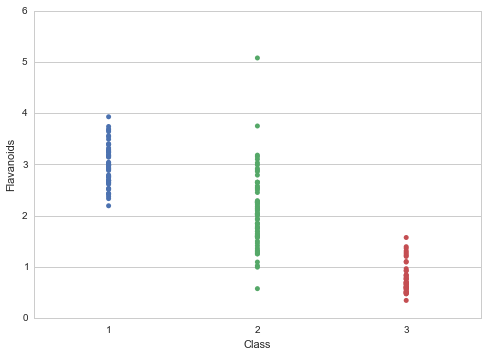

In [167]:
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="Class", y="Flavanoids", data=wine);

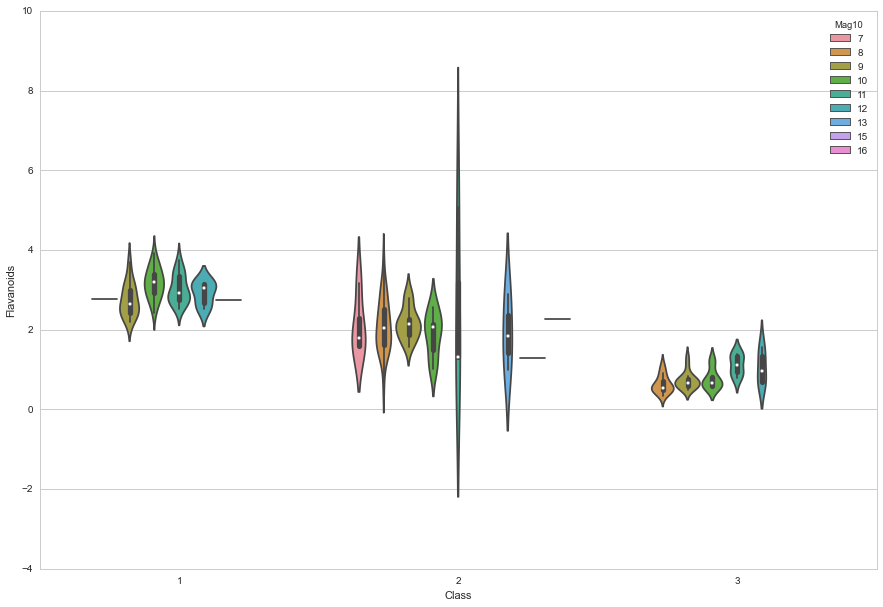

In [168]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Class", y="Flavanoids", hue="Mag10", data=wine);

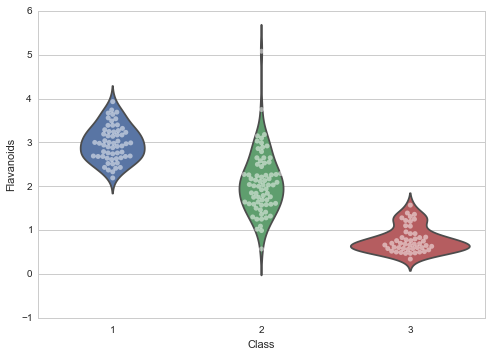

In [169]:
sns.violinplot(x="Class", y="Flavanoids", data=wine, inner=None)
sns.swarmplot(x="Class", y="Flavanoids", data=wine, color="w", alpha=.5);

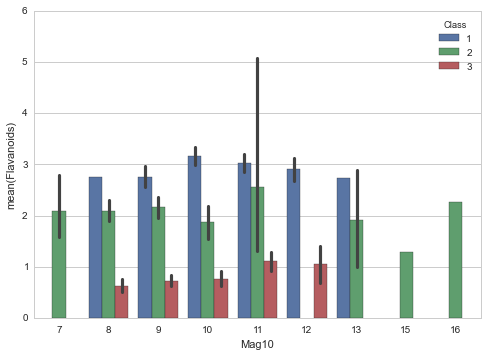

In [170]:
sns.barplot(x="Mag10", y="Flavanoids", hue="Class", data=wine);

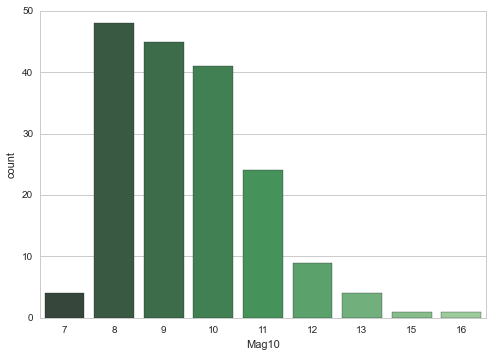

In [171]:
sns.countplot(x="Mag10", data=wine, palette="Greens_d");

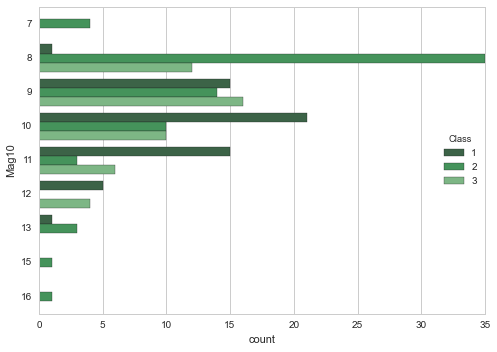

In [172]:
sns.countplot(y="Mag10", hue="Class", data=wine, palette="Greens_d");

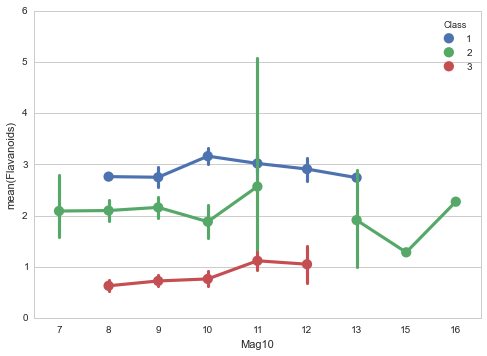

In [173]:
sns.pointplot(x="Mag10", y="Flavanoids", hue="Class", data=wine);

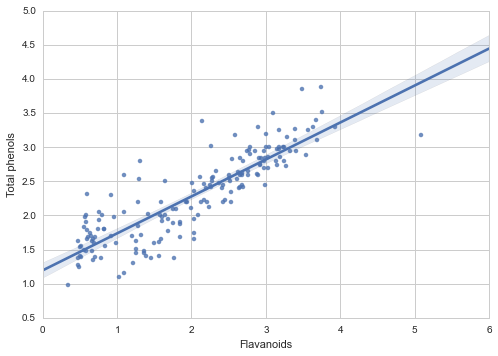

In [174]:
sns.regplot(x="Flavanoids", y="Total phenols", data=wine);

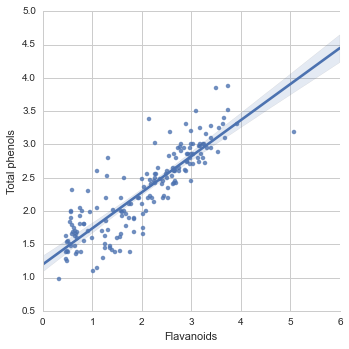

In [175]:
sns.lmplot(x="Flavanoids", y="Total phenols", data=wine);

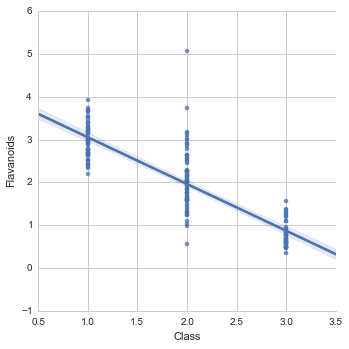

In [176]:
sns.lmplot(x="Class", y="Flavanoids", data=wine);

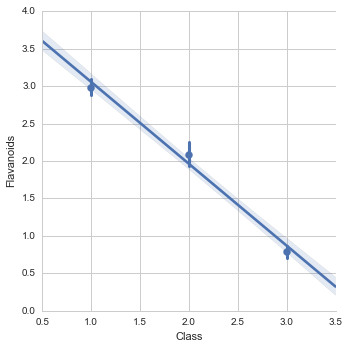

In [177]:
sns.lmplot(x="Class", y="Flavanoids", data=wine, x_estimator=np.mean);

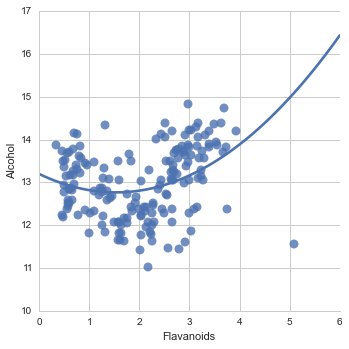

In [178]:
sns.lmplot(x="Flavanoids", y="Alcohol", data=wine,
           order=2, ci=None, scatter_kws={"s": 80});

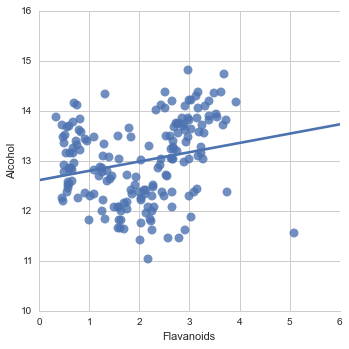

In [179]:
sns.lmplot(x="Flavanoids", y="Alcohol", data=wine,
           ci=None, scatter_kws={"s": 80});

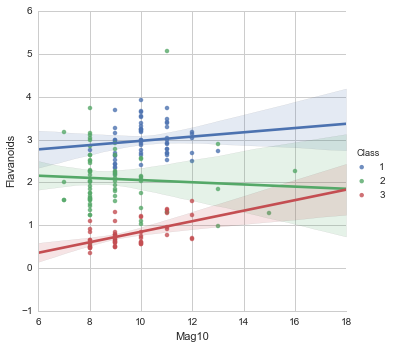

In [180]:
sns.lmplot(x="Mag10", y="Flavanoids", hue="Class", data=wine);

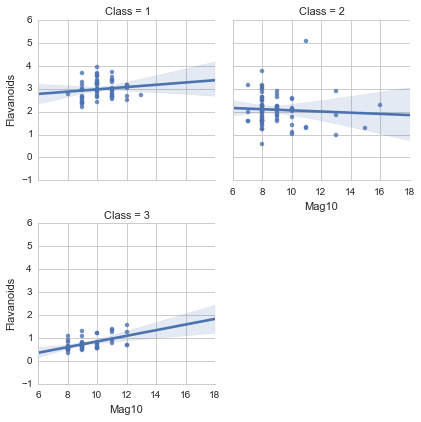

In [181]:
sns.lmplot(x="Mag10", y="Flavanoids", col="Class", data=wine,
           col_wrap=2, size=3);